[.] Type <c> to print or <p> to plot
[>] p


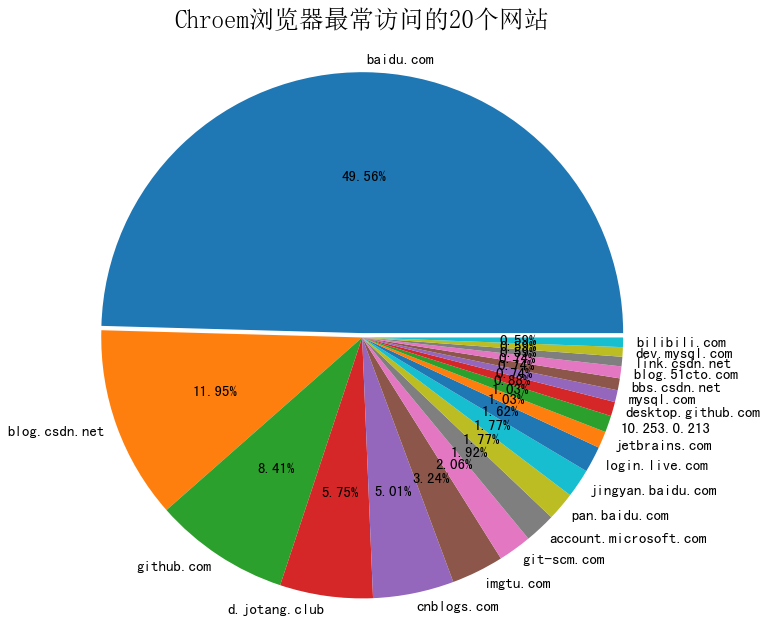

In [19]:
import os  
import sqlite3  
import operator  
from collections import OrderedDict  
import matplotlib.pyplot as plt  
from matplotlib.font_manager import FontProperties
import pymysql


def parse(url):  
    try:  
        parsed_url_components = url.split('//')    #先用//分为两部分组成的列表
        sublevel_split = parsed_url_components[1].split('/', 1) #再用/分割后面部分
        domain =sublevel_split[0].replace("www.", "")  
        return domain
    except IndexError:  
        print('URL format error!')                #处理错误则返回url链接格式错误
        
def analyze(results):
    i=1
    
    prompt =input("[.] Type <c> to print or <p> to plot\n[>] ")

    if prompt == "c":
        with open('./history.txt','w') as f:
            f.write('   20 most frequently visited web sites\n')
            for site, count in sites_count_sorted.items():
                f.write('\t'+str(i)+'.  '+site+'\n')
                i += 1
                
    elif prompt == "p":

            percents = results.values()
            names = results.keys()
            plt.rcParams['font.sans-serif']=['SimHei']
            #plt.rcParams['font.family']='sans-serif'  #可要可不要
            plt.rcParams['axes.unicode_minus'] = False
            plt.axes(aspect='equal')  #将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆
            font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=18)
            plt.pie(x = percents,
                    labels = names,
                    autopct="%.2f%%",
                    pctdistance=0.6,
                    labeldistance=1.05,
                    radius=3.0,
                    explode=(0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
                    textprops={'fontsize':15, 'color':'black'},  #设置文本标签的属性值
                    #wedgeprops={'linewidth':0.2, 'edgecolor':'white'},  #设置饼图内外边界的属性值   
                    )

            plt.title('Chroem浏览器最常访问的20个网站',fontproperties=font,fontsize=25,loc = 'center',y=1.9)

        
    else:  
        print("[.] Uh?")  
        quit()  

if __name__=='__main__':
    #path to user's history database (Chrome)  
    data_path = os.path.expanduser('~')+r"\AppData\Local\Google\Chrome\User Data\Default"  #~语句作用是把前面一部分路径补出来（Chen sir）

    #data_path=r'C:\Users\Administrator\AppData\Local\Google\Chrome\User Data\Default'
    files=os.listdir(data_path)                       #此语句的参数需要是一个绝对路径，用于返回一个由文件名和目录名组成的列表
    
    history_db = os.path.join(data_path, 'History1')   #将前后地址合起来定位历史缓存文件
 
    #querying the db  
    c = sqlite3.connect(history_db)     #连接数据库

 
    cursor = c.cursor()                  #获得游标方便进行操作
    
    select_statement = "SELECT urls.url, urls.visit_count FROM urls, visits WHERE urls.id = visits.url;"    #收集url地址及访问次数两个要素
    cursor.execute(select_statement)     #执行上一步的语句
    
    results = cursor.fetchall() #tuple  

    sites_count = {} #dict makes iterations easier :D  声明了一个名为sites_counts字典使迭代容易 ，同时对应url与访问次数
 
    for url, count in results:  
        url = parse(url)         #调用parse函数，处理该格式不规范的url
        if url in sites_count:  
            sites_count[url] += 1  
        else:  
            sites_count[url] = 1  
    sites_count_sorted = OrderedDict(sorted(sites_count.items(), key= lambda sites_count: sites_count[1], reverse=True))
    while len(sites_count_sorted)>20:
        sites_count_sorted.popitem()
    analyze (sites_count_sorted )  #调用analye函数